## Experiments with real world data

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from factorial_model import FactorialModel
from forward_selection import ForwardSelection

### [INSERT NEW DATASETS]

- Continuous output variable (linear regression)

- Randomized control trial

### Labor Market Discrimination

In [4]:
df = pd.read_stata('data/lakisha_aer.dta')

In [41]:
df.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [30]:
df.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

### Charitable Giving

In [3]:
df = pd.read_stata('data/AER merged.dta')

In [8]:
df.head(10)

,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
0,0,1,Control,0,0,Control,0,0,0,0,...,0.0,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.000000
1,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,0,0,"$100,000",0,0,1,0,...,0.0,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.000000
3,1,0,1,0,0,Unstated,0,0,0,1,...,1.0,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.000000
4,1,0,1,0,0,"$50,000",0,1,0,0,...,0.0,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.000000
5,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,0.862053,0.071572,0.363239,2.92,61779.0,0.941339,0.200840,0.962345
6,1,0,1,0,0,"$25,000",1,0,0,0,...,1.0,0.0,0.882912,0.097408,0.376446,2.10,54655.0,0.695880,0.554568,1.000000
7,1,0,2,1,0,"$100,000",0,0,1,0,...,0.0,1.0,0.903297,0.019494,0.212040,2.47,141527.0,0.897906,0.708122,1.000000
8,1,0,2,1,0,Unstated,0,0,0,1,...,1.0,0.0,0.927851,0.004739,0.249465,2.49,37017.0,0.763151,0.205828,0.599052
9,1,0,1,0,0,"$25,000",1,0,0,0,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Appendix

### 5-bit DAC process (Liu and Huang, NIST)

In [3]:
# Load data and take treatment and response variables only
dac = np.loadtxt("data/LIU.DAT", skiprows=25)
dac = dac[:, :6]

In [4]:
# Initialize factorial model
fm = FactorialModel(
    n=dac.shape[0],
    k=dac.shape[1] - 1,
    degree=dac.shape[1] - 1,
    contrast_coding=True,
    beta_seed=0,
)

In [5]:
# Method to evaluate Lasso model
def evaluate_lasso():
    fm.convert_and_split_data(dac[:, 1:], dac[:, 0], is_dummy_coded=True, seed=None)
    fm.fit_lasso()
    fm.predict()
    fm.compute_mse()
    fm.compute_r2()

In [6]:
# Method to evaluate forward selection
def evaluate_forward_selection(T_test, y_test):
    fs.forward_selection()
    fs.predict(T_test)
    fs.compute_mse(y_test)
    fs.compute_r2()

In [7]:
# Evaluate two models for NUM_TRIALS
NUM_TRIALS = 100
lasso_mses = []
fs_mses = []
lasso_r2s = []
fs_r2s = []
lasso_betas = []
fs_betas = []
lasso_expected_outcomes = []
fs_expected_outcomes = []

for i in range(NUM_TRIALS):
    evaluate_lasso()
    lasso_mses.append(fm.mse)
    lasso_r2s.append(fm.r2)
    lasso_betas.append(fm.beta_hat)
    lasso_expected_outcomes.append(fm.expected_outcomes)

    fs = ForwardSelection(fm.T_train, fm.y_train, fm.k, strong_heredity=False)
    evaluate_forward_selection(fm.T_test, fm.y_test)
    fs_mses.append(fs.mse)
    fs_r2s.append(fs.r2)
    fs_betas.append(fs.results.params)
    beta_mask = fm.pf.fit_transform(fm.pf.powers_)
    fs_expected_outcome = beta_mask @ fs.results.params
    fs_expected_outcomes.append(fs_expected_outcome)

avg_lasso_betas = np.mean(lasso_betas, axis=0)
avg_fs_betas = np.mean(fs_betas, axis=0)
avg_lasso_expected_outcomes = np.mean(lasso_expected_outcomes, axis=0)
avg_fs_expected_outcomes = np.mean(fs_expected_outcomes, axis=0)

In [8]:
# Compute sparsity for theoretical lower bound on observations
dac_sparsity = np.count_nonzero(avg_lasso_betas)

In [9]:
# MSE comparison
avg_lasso_mse = np.mean(np.array(lasso_mses))
avg_fs_mses = np.mean(np.array(fs_mses))
std_lasso_mse = np.std(np.array(lasso_mses))
std_fs_mses = np.std(np.array(fs_mses))
print(f"Lasso MSE: {avg_lasso_mse} +/- {std_lasso_mse}")
print(f"Forward Selection MSE: {avg_fs_mses} +/- {std_fs_mses}")

Lasso MSE: 0.18094213744870163 +/- 0.007946418834260801
Forward Selection MSE: 1.913554981000473e+22 +/- 6.933352568418094e+22


In [10]:
# R2 comparison
avg_lasso_r2 = np.mean(np.array(lasso_r2s))
avg_fs_r2 = np.mean(np.array(fs_r2s))
std_lasso_r2 = np.std(np.array(lasso_r2s))
std_fs_r2 = np.std(np.array(fs_r2s))
print(f"Lasso R2: {avg_lasso_r2} +/- {std_lasso_r2}")
print(f"Forward Selection R2: {avg_fs_r2} +/- {std_fs_r2}")

Lasso R2: 0.005437917261413583 +/- 0.0021808808436180435
Forward Selection R2: 0.005879434094846742 +/- 0.0023553390820924545


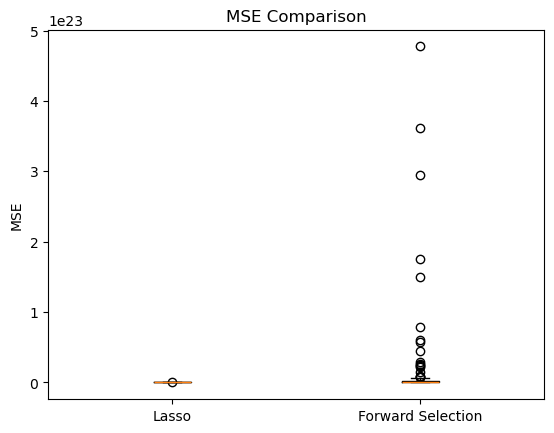

In [11]:
# Plot MSE boxplot
plt.figure()
plt.boxplot([lasso_mses, fs_mses], labels=["Lasso", "Forward Selection"])
plt.ylabel("MSE")
plt.title("MSE Comparison")
plt.show()

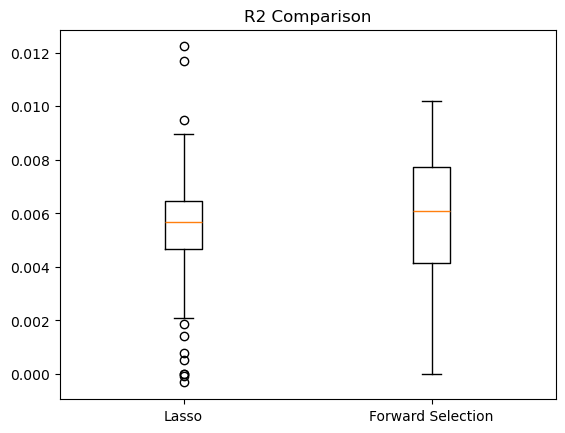

In [12]:
# Plot R2 boxplot
plt.figure()
plt.boxplot([lasso_r2s, fs_r2s])
plt.xticks([1, 2], ["Lasso", "Forward Selection"])
plt.title("R2 Comparison")
plt.show()

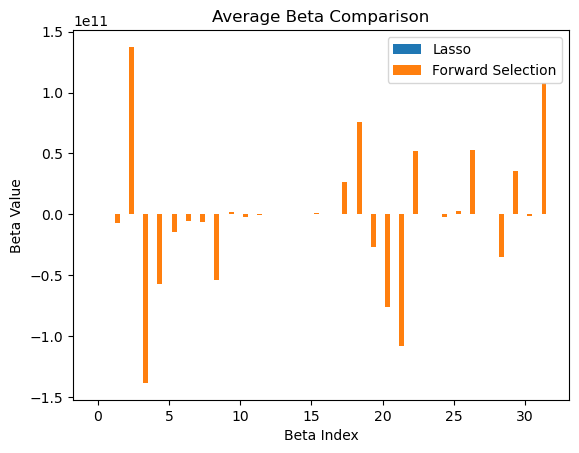

In [13]:
# Plot average betas for Lasso and Forward Selection
plt.figure()
bar_width = 0.35
index = np.arange(len(avg_lasso_betas))
plt.bar(index, avg_lasso_betas, bar_width, label="Lasso")
plt.bar(index + bar_width, avg_fs_betas, bar_width, label="Forward Selection")
plt.xlabel("Beta Index")
plt.ylabel("Beta Value")
plt.title("Average Beta Comparison")
plt.legend()
plt.show()

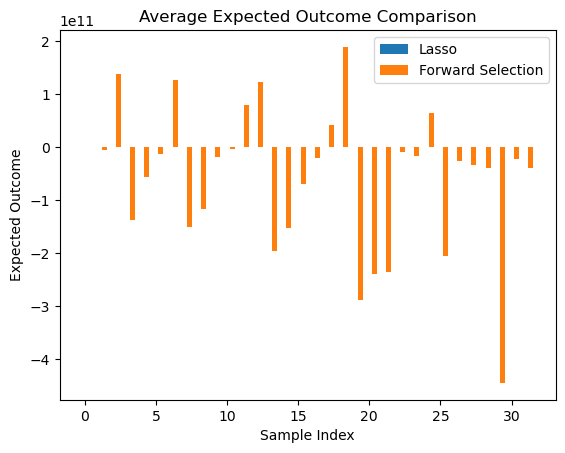

In [14]:
# Plot average expected outcomes for Lasso and Forward Selection
plt.figure()
bar_width = 0.35
index = np.arange(len(avg_lasso_expected_outcomes))
plt.bar(index, avg_lasso_expected_outcomes, bar_width, label="Lasso")
plt.bar(index + bar_width, avg_fs_expected_outcomes, bar_width, label="Forward Selection")
plt.xlabel("Sample Index")
plt.ylabel("Expected Outcome")
plt.title("Average Expected Outcome Comparison")
plt.legend()
plt.show()

### Carlson (2015)

In [15]:
base = importr('base')
utils = importr('utils')
robjects.r('install.packages("FindIt", repos="https://CRAN.R-project.org/")')

R[write to console]: trying URL 'https://CRAN.R-project.org/src/contrib/FindIt_1.2.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 150340 bytes (146 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

<rpy2.rinterface_lib.sexp.NULLType object at 0x11ea49a50> [0]

In [16]:
findit = importr('FindIt')
robjects.r('data("Carlson", package = "FindIt")')
carlson_rdf = robjects.r['Carlson']
carlson_df = pandas2ri.rpy2py(carlson_rdf)
carlson_df.head()

,won,newRecordF,promise,coeth_voting,relevantdegree,respcodeS,contestresp
1,1,6,1,2,1,1,1.014310e+09
2,0,7,3,1,2,1,1.014310e+09
3,1,7,3,1,2,1,1.014210e+09
4,0,3,2,1,2,1,1.014210e+09
5,0,7,1,1,1,1,1.014110e+09


In [17]:
# Convert Record, Coethnicity and Degree to binary
carlson = carlson_df.iloc[:, :5].to_numpy(dtype=int)
carlson[:, 1] = np.where(carlson[:, 1] < 4, 1, 0)
carlson[:, 3:] = np.where(carlson[:, 3:] == 2, 0, 1)

In [18]:
# Convert 3 promises to 2 dummy coded categories
promises = np.zeros((carlson.shape[0], 3))
promises[np.arange(carlson.shape[0]), carlson[:, 2] - 1] = 1
carlson = np.delete(carlson, 2, axis=1)
carlson = np.insert(carlson, 2, promises[:,:2].T, axis=1)
carlson[:5]

array([[1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 1]])

In [19]:
# Initialize factorial model
fm = FactorialModel(
    n=carlson.shape[0],
    k=carlson.shape[1] - 1,
    degree=carlson.shape[1] - 1,
    contrast_coding=True,
    beta_seed=0,
)

In [20]:
# Method to evaluate Lasso model
def evaluate_lasso():
    fm.convert_and_split_data(carlson[:, 1:], carlson[:, 0], is_dummy_coded=True, seed=None)
    fm.fit_lasso(logistic=True)     # Use logistic regression
    fm.predict()
    fm.compute_mse()

In [21]:
# Method to evaluate forward selection
def evaluate_forward_selection(T_test, y_test):
    fs.forward_selection(logistic=True)     # Use logistic regression
    fs.predict(T_test)
    fs.compute_mse(y_test)

In [22]:
# Evaluate two models for NUM_TRIALS
NUM_TRIALS = 30
lasso_mses = []
fs_mses = []
lasso_betas = []
fs_betas = []
lasso_expected_outcomes = []
fs_expected_outcomes = []

for i in range(NUM_TRIALS):
    evaluate_lasso()
    lasso_mses.append(fm.mse)
    lasso_betas.append(fm.beta_hat)
    lasso_expected_outcomes.append(fm.expected_outcomes)

    fs = ForwardSelection(fm.T_train, fm.y_train, fm.k, strong_heredity=False)
    evaluate_forward_selection(fm.T_test, fm.y_test)
    fs_mses.append(fs.mse)
    fs_betas.append(fs.results.params)
    beta_mask = fm.pf.fit_transform(fm.pf.powers_)
    fs_expected_outcome = beta_mask @ fs.results.params
    fs_expected_outcomes.append(fs_expected_outcome)

avg_lasso_betas = np.mean(lasso_betas, axis=0)
avg_fs_betas = np.mean(fs_betas, axis=0)
avg_lasso_expected_outcomes = np.mean(lasso_expected_outcomes, axis=0)
avg_fs_expected_outcomes = np.mean(fs_expected_outcomes, axis=0)

Optimization terminated successfully.
         Current function value: 0.684831
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.693135
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.693135
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.693135
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.693135
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.693135
         Iterations: 3
         Function evaluations: 4
         Gradien

In [23]:
# Compute sparsity for theoretical lower bound on observations
carlson_sparsity = np.count_nonzero(avg_lasso_betas)

In [24]:
# MSE comparison
avg_lasso_mse = np.mean(np.array(lasso_mses))
avg_fs_mses = np.mean(np.array(fs_mses))
std_lasso_mse = np.std(np.array(lasso_mses))
std_fs_mses = np.std(np.array(fs_mses))
print(f"Lasso MSE: {avg_lasso_mse} +/- {std_lasso_mse}")
print(f"Forward Selection MSE: {avg_fs_mses} +/- {std_fs_mses}")

Lasso MSE: 0.45739309634209163 +/- 0.01776620261733647
Forward Selection MSE: 0.25013703409051696 +/- 0.00016598892051435563


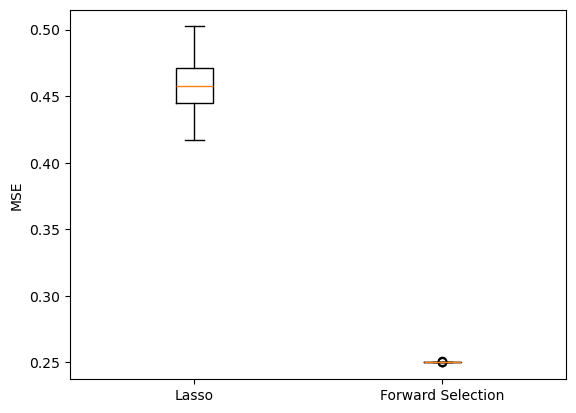

In [25]:
# Plot MSE boxplot
plt.figure()
plt.boxplot([lasso_mses, fs_mses])
plt.xticks([1, 2], ["Lasso", "Forward Selection"])
plt.ylabel("MSE")
plt.show()

## Lower bound on number of observations

### DAC

In [26]:
num_treatments = dac.shape[1] - 1
num_coeffs = 2 ** num_treatments
general_bound = dac_sparsity * np.log(num_coeffs)

In [27]:
num_obs = np.arange(20, dac.shape[0], 20)
mse_over_num_obs = []

for n in num_obs:
    fm = FactorialModel(
        n=n,
        k=num_treatments,
        degree=num_treatments,
        contrast_coding=True,
        beta_seed=0,
    )

    fm.convert_and_split_data(dac[:n, 1:], dac[:n, 0], is_dummy_coded=True, seed=None)
    fm.fit_lasso()
    fm.predict()
    fm.compute_mse()
    mse_over_num_obs.append(fm.mse)

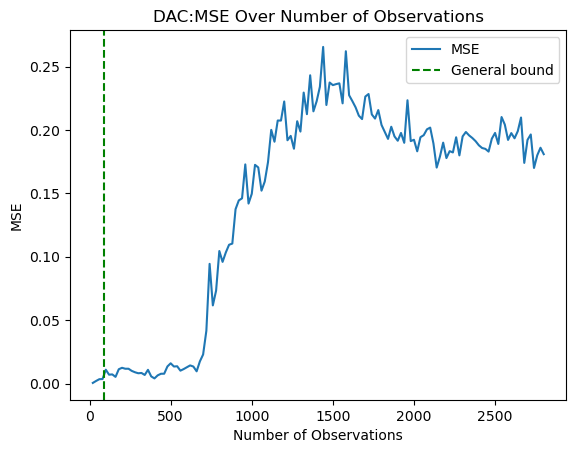

In [28]:
# Plot MSE over number of observations
plt.figure()
plt.plot(num_obs, mse_over_num_obs, label="MSE")
plt.axvline(general_bound, color="green", linestyle="--", label="General bound")
plt.xlabel("Number of Observations")
plt.ylabel("MSE")
plt.title("DAC: MSE Over Number of Observations")
plt.legend()
plt.show()

### Carlson

In [29]:
num_treatments = carlson.shape[1] - 1
num_coeffs = 2 ** num_treatments
general_bound = carlson_sparsity * np.log(num_coeffs)

In [30]:
num_obs = np.arange(20, carlson.shape[0], 20)
mse_over_num_obs = []

for n in num_obs:
    fm = FactorialModel(
        n=n,
        k=num_treatments,
        degree=num_treatments,
        contrast_coding=True,
        beta_seed=0,
    )

    fm.convert_and_split_data(carlson[:n, 1:], carlson[:n, 0], is_dummy_coded=True, seed=None)
    fm.fit_lasso(logistic=True)
    fm.predict()
    fm.compute_mse()
    mse_over_num_obs.append(fm.mse)

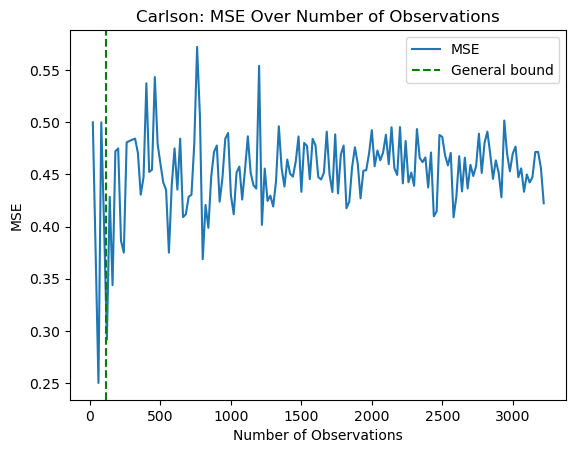

In [31]:
# Plot MSE over number of observations
plt.figure()
plt.plot(num_obs, mse_over_num_obs, label="MSE")
plt.axvline(general_bound, color="green", linestyle="--", label="General bound")
plt.xlabel("Number of Observations")
plt.ylabel("MSE")
plt.title("Carlson: MSE Over Number of Observations")
plt.legend()
plt.show()